In [1]:
import numpy as np
from process_data import load_data
from phased_lstm import trainer, plstmglucosemodel

In [26]:
xt: np.ndarray
xs: np.ndarray
xt_t: np.ndarray
ys: np.ndarray
loader: load_data.LoadData = load_data.LoadData()
xs, xt, xt_t, ys = loader.load_gluose_data_from_file(_filename="../data/2022112/salida.csv", _future_steps=2, _scaler=load_data.ScalerValues.MinMaxScaler)

Loading data_load from file ../data/2022112/salida.csv
Load data_load sucessfully..


In [3]:
xs_train: np.ndarray
xt_train: np.ndarray
xt_t_train: np.ndarray
ys_train: np.ndarray
xs_valid: np.ndarray
xt_valid: np.ndarray
xt_t_valid: np.ndarray
ys_valid: np.ndarray
xs_test: np.ndarray
xt_test: np.ndarray
xt_t_test: np.ndarray
ys_test: np.ndarray
(
    xs_train,
    xt_train,
    xt_t_train,
    ys_train,
    xs_valid,
    xt_valid,
    xt_t_valid,
    ys_valid,
    xs_test,
    xt_test,
    xt_t_test,
    ys_test,
) = load_data.split_all_data(xs, xt, xt_t, ys, 0.8, 0.1)


In [4]:
glucose_model: plstmglucosemodel.PlstmGlucoseModel = plstmglucosemodel.PlstmGlucoseModel(_input_dim=2,
                                                                                         _batch_size=1,
                                                                                         _hidden_dim=64,
                                                                                         _use_lstm=True,
                                                                                         _outputl1=512,
                                                                                         _dropout1=0.3,
                                                                                         _outputl2=256,
                                                                                         _dropout2=0.3,
                                                                                         _exp_func=True,
                                                                                         _nlf1="relu",
                                                                                         _nlf2="relu",
                                                                                         _batch_normalization=False)

events = []
trainer: trainer.Trainer = trainer.Trainer(_events=events, _model=glucose_model, _optimizer_name="adam", _train_data=(xs_train, xt_train, ys_train), _test_data=(xs_valid,xt_valid, ys_valid), _batch_size=1, _lr=1e-3, _epochs=epochs)

In [5]:
events = []
trainer_t: trainer.Trainer = trainer.Trainer(_events=events
                                           ,_model=glucose_model
                                           , _optimizer_name="adam"
                                           ,_train_data=(xs_train, xt_train, ys_train)
                                           ,_test_data=(xs_valid,xt_valid, ys_valid)
                                           ,_batch_size=1
                                           ,_lr=1e-3
                                           ,_epochs=10)

In [6]:
trainer_t.train_and_test(_epochs=10)

Epoch: 1 / 10 Test: 0.04207582542273615
Epoch: 1 / 10 Loss: 0.05363234877586365
Epoch: 2 / 10 Test: 0.04346503258463653
Epoch: 2 / 10 Loss: 0.02764815092086792
Epoch: 3 / 10 Test: 0.044515900084936694
Epoch: 3 / 10 Loss: 0.041903138160705566
Epoch: 4 / 10 Test: 0.03814807453314077
Epoch: 4 / 10 Loss: 0.028307706117630005
Epoch: 5 / 10 Test: 0.037373490598318834
Epoch: 5 / 10 Loss: 0.05559724569320679
Epoch: 6 / 10 Test: 0.03938488295779196
Epoch: 6 / 10 Loss: 0.057477355003356934
Epoch: 7 / 10 Test: 0.04152808429775055
Epoch: 7 / 10 Loss: 0.011722981929779053
Epoch: 8 / 10 Test: 0.03507353697351705
Epoch: 8 / 10 Loss: 0.061079710721969604
Epoch: 9 / 10 Test: 0.041926377348233984
Epoch: 9 / 10 Loss: 0.013959020376205444
Epoch: 10 / 10 Test: 0.035932434230706335
Epoch: 10 / 10 Loss: 0.04241734743118286


In [11]:
import torch

In [12]:
torch.save(
    glucose_model.state_dict(),
    f"models/{glucose_model.getModelName()}"
)

In [42]:
y_pred = []
y_real = []
for i in range(0,xs_valid.shape[0]):
    xs_a = xs_valid[i]
    xt_a = xt_valid[i]
    y_real.append(ys_valid[i])
    output = glucose_model.predict(xs_a,xt_a)
    y_pred.append(output.item())

In [36]:
import matplotlib.pyplot as plt

In [44]:
loader.scaler.inverse_transform_value(y_pred)

array([209.6004844 , 219.38222075, 219.68179953, ..., 122.27321963,
       140.03590381, 154.27409637])

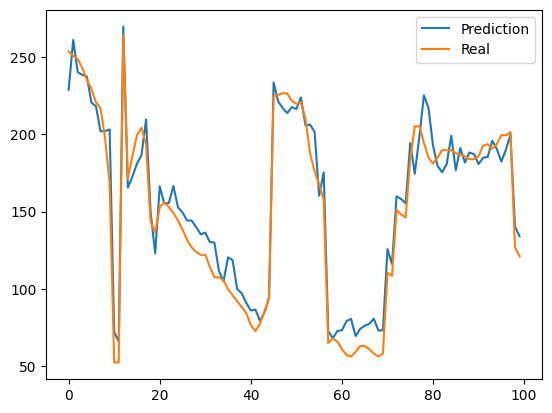

In [45]:
start = 1075
n_dif = 100
stop = start + n_dif
plt.plot(loader.scaler.inverse_transform_value(y_pred[start:stop]),label="Prediction")
plt.plot(loader.scaler.inverse_transform_value(y_real[start:stop]),label="Real")
plt.legend()
plt.show()

In [47]:
load_data.storeScaler(
        _scaler=loader.scaler
        , _model_name=glucose_model.getModelName()
        , _model_folder="models/")